<a href="https://colab.research.google.com/github/DannaCarrillo05/ApuntesIA/blob/main/Apuntes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
diccionario={"pedro":10,
             "juan":11,
             "Maria":12

}

In [ ]:
lista=("pedro","juan","maria")

In [ ]:
arreglo=["pedro","juan","maria"]

In [15]:
import pandas as pd
import numpy as np

# Crear un dataset simulado
np.random.seed(42)
data = {
    "Estudiante": [f"E{i}" for i in range(1, 21)],
    "Edad": np.random.randint(18, 25, size=20),
    "Género": np.random.choice(["Femenino", "Masculino"], size=20),
    "Nota_Matemáticas": np.random.normal(70, 10, size=20).round(1),
    "Nota_Ciencias": np.random.normal(75, 12, size=20).round(1),
    "Nota_Inglés": np.random.normal(65, 15, size=20).round(1),
}
df = pd.DataFrame(data)

In [12]:
clientes = pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Churn_Modelling.csv")
clientes.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
2,2,15647311,Hill,608,Spain,NaN,41.0,1,83807.86,25,0,1,112542.58,0
3,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
4,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0


In [4]:
clientes.shape

(10002, 14)

.drop es un metodo que borra

In [10]:
clientes.drop(["RowNumber"], axis=1, inplace=True)

In [13]:
clientes.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# EDA es Exploratory Data Analysis

describe()hace un analisis descriptivo de todos los datos numericos

Las columnas en las que todos sus datos son unicos deben eliminarse ya que no sirven, igualmente en las que todos sus datos son iguales

In [16]:
print("Descripción estadística:")
print(df.describe())

Descripción estadística:
            Edad  Nota_Matemáticas  Nota_Ciencias  Nota_Inglés
count  20.000000          20.00000      20.000000    20.000000
mean   21.500000          69.41500      77.925000    66.055000
std     1.670172           9.93565      11.608204    15.406269
min    19.000000          49.70000      56.900000    34.300000
25%    20.000000          62.82500      71.150000    53.400000
50%    21.500000          69.35000      75.900000    71.600000
75%    22.250000          76.22500      83.875000    77.350000
max    24.000000          89.10000     106.900000    83.500000


In [20]:
contarGeneros= df.Género.value_counts()
total = contarGeneros.sum()
hombresperc = (contarGeneros["Masculino"] / total) * 100
mujeresperc = (contarGeneros["Femenino"] / total) * 100
print(f"% de hombres: {hombresperc:.2f}%")
print(f"% de mujeres: {mujeresperc:.2f}%")

% de hombres: 60.00%
% de mujeres: 40.00%


<Axes: title={'center': 'Distribución de Género'}, ylabel='count'>

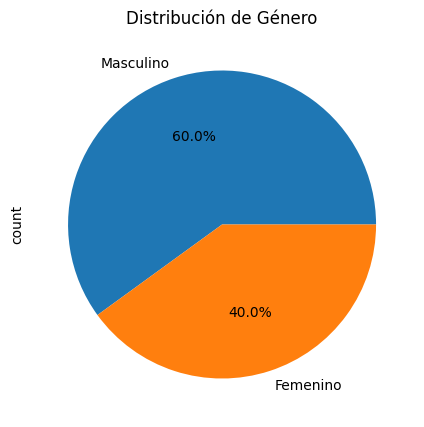

In [21]:
contarGeneros.plot(kind="pie" , title="Distribución de Género", figsize=(5,5), autopct="%1.1f%%")

si entre clases hay diferecnias mayores a el 30% los datos estan desvalanceados y hay que buscar una estrategia para balancearlos


cual es la cardinalidad de genero?
respuesta: los valores que puede tomar

que metodo de python permite determinar la cardinalidad de un feature?
respuesta: unique

In [22]:
df.describe()


,Edad,Nota_Matemáticas,Nota_Ciencias,Nota_Inglés
count,20.000000,20.00000,20.000000,20.000000
mean,21.500000,69.41500,77.925000,66.055000
std,1.670172,9.93565,11.608204,15.406269
min,19.000000,49.70000,56.900000,34.300000
25%,20.000000,62.82500,71.150000,53.400000
50%,21.500000,69.35000,75.900000,71.600000
75%,22.250000,76.22500,83.875000,77.350000
max,24.000000,89.10000,106.900000,83.500000


In [24]:
df.describe(include="float").T["50%"]["Nota_Ciencias"]
#es lo mismo que
df.Nota_Ciencias.median()

75.9

# ⚛Visualizaciones

 los graficos de barras sirven para datos numericos y de clase. Lo histogramas solo sirven para datos numericos.

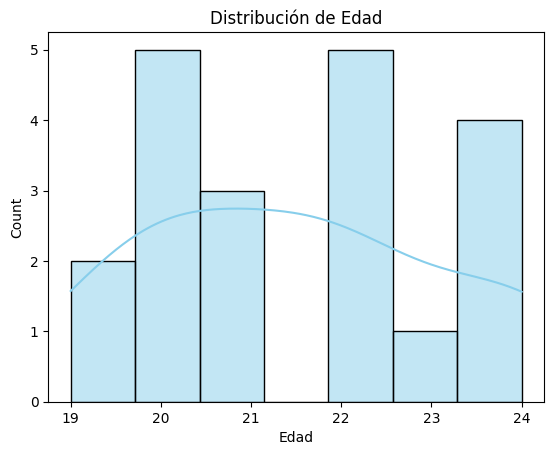

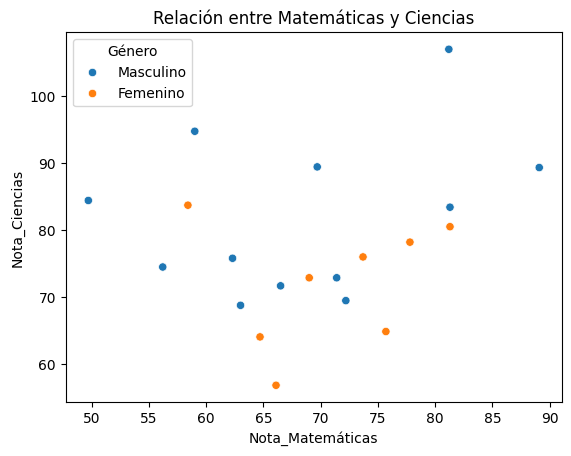

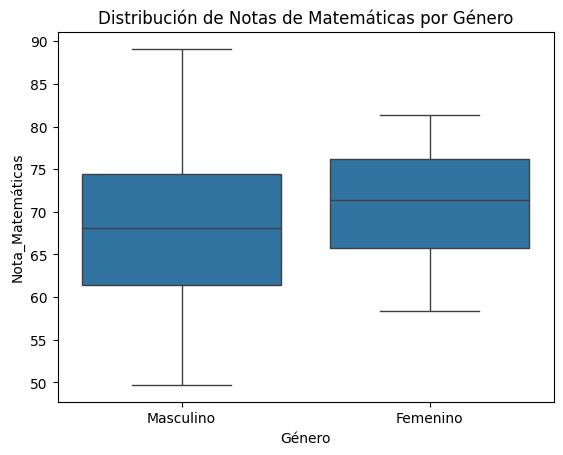

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de edades
sns.histplot(df['Edad'], bins=7, kde=True, color='skyblue')
plt.title("Distribución de Edad")
plt.show()

# Gráfico de dispersión: Nota_Matemáticas vs Nota_Ciencias
sns.scatterplot(x="Nota_Matemáticas", y="Nota_Ciencias", hue="Género", data=df)
plt.title("Relación entre Matemáticas y Ciencias")
plt.show()

# Boxplot de notas por género
sns.boxplot(x="Género", y="Nota_Matemáticas", data=df)
plt.title("Distribución de Notas de Matemáticas por Género")
plt.show()

debo usar

```
plt.show()
```
entre cada grafica para no sobreescribirlas


debo usar un numero de bines que permita que cada clase en el histograma tenga datos